<a href="https://colab.research.google.com/github/rohitrv8922/rohitrv8922/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Firstly we import the import libraries which are required here

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import dataset**

In [50]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Load dataset**

In [51]:
df=pd.read_excel('/content/drive/MyDrive/Data Science Assignment/DS - Assignment Part 1 data set.xlsx')

In [52]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


#Data Preprocessing

In [53]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [55]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

**Renaming column name**

In [56]:
df.rename(columns={'Number of bedrooms':'Bedrooms','Transaction date':'Transaction_date','Number of convenience stores':'Convenience_stores','House price of unit area':'House_price','House size (sqft)':'House_sqft','House Age':'House_age','Distance from nearest Metro station (km)':'Metro_stations'},inplace=True)
df.head()

,Transaction_date,House_age,Metro_stations,Convenience_stores,latitude,longitude,Bedrooms,House_sqft,House_price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


**Correlation Heatmap**

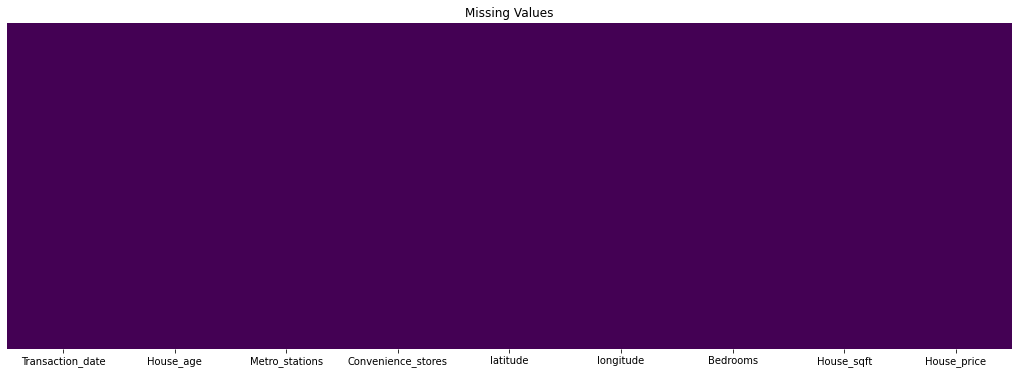

In [76]:
plt.figure(figsize=(18,6))
plt.title('Missing Values')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**This heatmap clearly shows that there is no missing or null values present in our dataset**

#Data Visualization

#Let see the bedroom wise most common houses

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

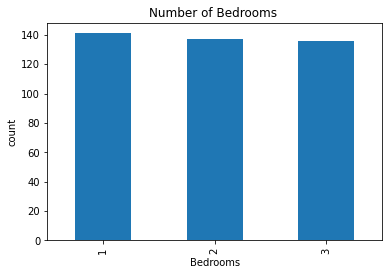

In [57]:
df['Bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms ')
plt.xlabel('Bedrooms')
plt.ylabel('count')
sns.despine

**We can clearly see that most of the houses which are commonly sold are followed by 1 bedroom.**

#Visualize House location based on their latitudes and longitudes

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

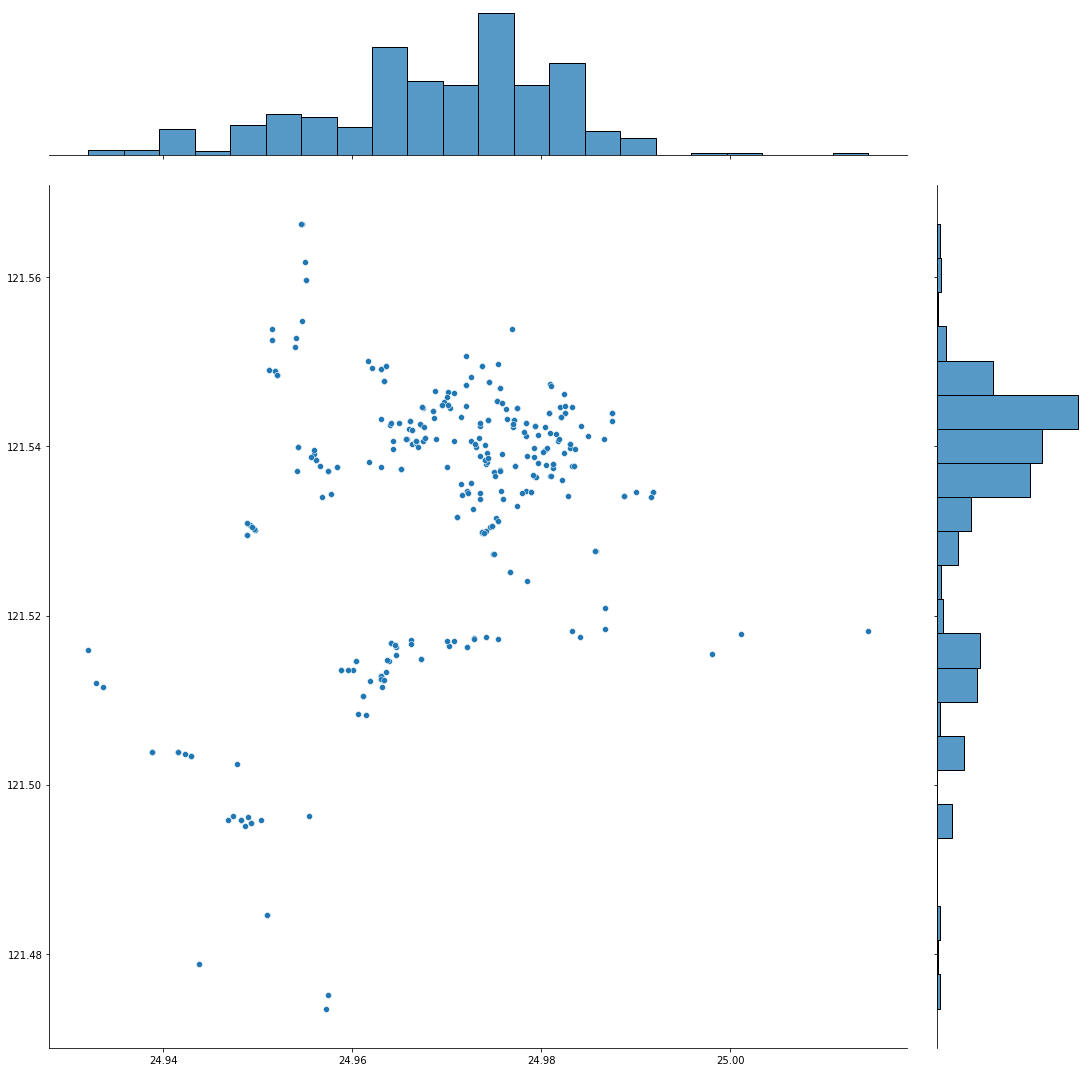

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [58]:
plt.figure(figsize=(8,8))
sns.jointplot(x=df.latitude.values,y=df.longitude.values,size=15)
plt.xlabel('Latitudes',fontsize=10)
plt.ylabel('Longitudes',fontsize=10)
plt.show()
sns.despine

**Here we can observe that most of houses were in the location of latitudes are between 24.96 to 24.98 and on longitude it was 121.52 to 121.56**

#Now let see how the common factors affecting the price of the Houses

Text(0.5, 1.0, 'House price VS House_sqft')

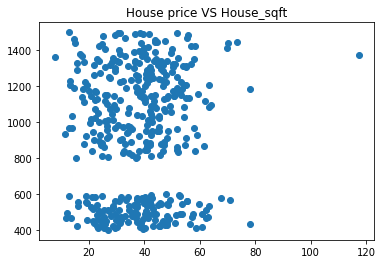

In [59]:
plt.scatter(df.House_price,df.House_sqft)
plt.title('House price VS House_sqft')

**Most of the houses are those whose area are between  20 to 60 sq ft**

Text(0.5, 1.0, 'Price VS Location')

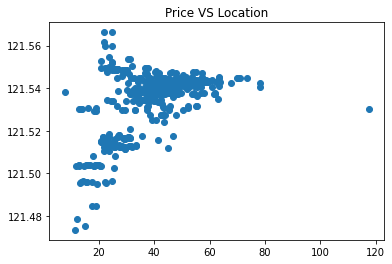

In [60]:
plt.scatter(df.House_price,df.longitude)
plt.title('Price VS Location')

**This plot shows that most prime location of the houses on the bases of longitudes are from 121.52 to 121.55**

Text(0.5, 1.0, 'Price VS Location')

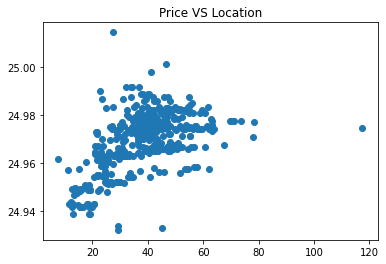

In [61]:
plt.scatter(df.House_price,df.latitude)
plt.title('Price VS Location')

**This plot shows that most prime location of the houses on the bases of latitudes are from 24.96 to 24.99**

Text(0.5, 1.0, 'Bedroom VS Price')

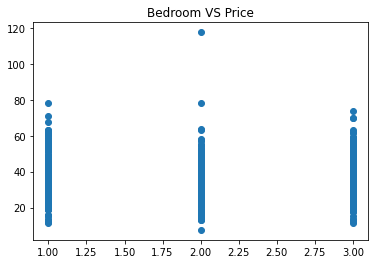

In [62]:
plt.scatter(df.Bedrooms,df.House_price)
plt.title('Bedroom VS Price')

**From this plot we can observe that most of the prices of the houses are of 2 bedrooms.It indicates that 2 bedroom houses are more in demand**  

Text(0.5, 1.0, 'House price Vs Nearest to Metro Stations')

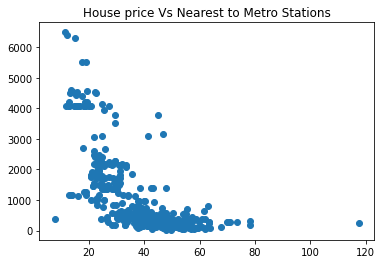

In [63]:
plt.scatter(df.House_price,df.Metro_stations)
plt.title('House price Vs Nearest to Metro Stations')

**In this plot we can see that most of the houses whose prices are high are nearest to the metro stations from 20 to 60 km** 

Text(0.5, 1.0, 'House price based on Age of the house ')

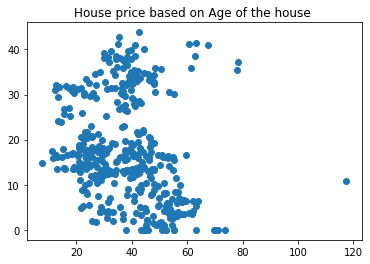

In [64]:
plt.scatter(df.House_price,df.House_age)
plt.title("House price based on Age of the house ")

**Here we can see tht those houses which are older than more than 60 years has low prices as compare to those houses which below from 60 years** 

Text(0.5, 1.0, 'House prices near the convenience stores')

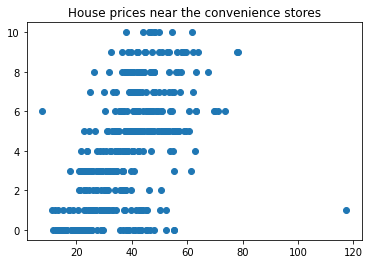

In [65]:
plt.scatter(df.House_price,df.Convenience_stores)
plt.title('House prices near the convenience stores')

**Most of the rice of the houses near the convenient stores are in the range from 20 to 40 km** 

#Modeling

#Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split

In [93]:
regr= LinearRegression()
labels= df['House_price']
convinent_date=[1 if values == 2015 else 0 for values in df.Transaction_date]
df['Transaction_date'] =convinent_date
train1= df.drop(['House_price'],axis=1)

In [94]:
X_train,X_test,y_train,y_test=train_test_split(train1,labels,test_size=0.8,random_state=5)
regr.fit(X_train,y_train)

LinearRegression()

In [69]:
regr.score(X_test,y_test)

0.5409703940705273

**As we can see The accuracy of the model  54% which is very low. So we need to apply other algorithm for the better accuracy of our model**

#Lets try another algorithm for better accuracy of the model

**we are taking GradientBoosting Algorithm which is an esemble algorithm which makes the model quality, accuracy and performance better**

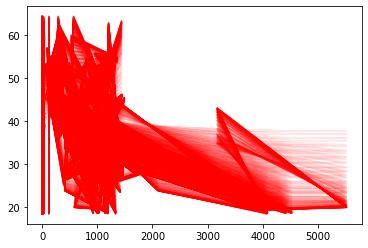

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
esn= GradientBoostingRegressor(n_estimators=200,max_depth=1).fit(X_train,y_train)
for predict in esn.staged_predict(X_train):
  plt.plot(X_train,predict,color='r',alpha=0.1)

In [95]:
from sklearn import ensemble
clf= ensemble.GradientBoostingRegressor(n_estimators=400,max_depth=5,min_samples_split=2,learning_rate=0.1,loss='ls')
clf.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400)

In [96]:
clf.score(X_test,y_test)

0.604680840169018

**Accuracy of our model is 60% which is little better than the previous model**

**Lets try some other algorithms**

In [98]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [100]:
, mean_absolute_percentage_error
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
Y_predict=RFR.predict(X_test)
print(mean_absolute_error(y_test,Y_predict))

5.187999999999998


In [102]:
, median_absolute_error
from sklearn.linear_model import SGDRegressor
SDG=SGDRegressor()
SDG.fit(X_train,y_train)
Y_predict=SDG.predict(X_test)
print(mean_absolute_error(y_test,Y_predict))

2441953663284087.5


#Conclusion

**1. Prices of the houses are high near the metro stations upto to the range from 20 to 60 km.**

**2. Prices of the @ bedrooms were greater as compare to the 1 bedroom and 3 bedrooms.It clearly indicates that most of the people likes to buy houses of 2 bedroom, so next time builder building the house of 2 bedrooms more in number for better profit.**

**3. Houses which are older than 60 years has low price .It's need to be re evaluate or reconstruct.**

**4. While performing the linear regression  we get model with 54% accuracy which is very low.**

**5. We use another algorithm to make our model prediction better .So we use Gradient Boosting and it's model accuracy is slightly better than the previous model which is 61%**

**5. Due to lack of data we are unable to predict the better accuracy for the model.But in the future it will be predicted better their data will become relevant and extend.** 